In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
target = pd.read_csv(r'files_for_lab\target.csv')
cols = []
for i in range(len(target.columns)):
    cols.append(target.columns[i].lower().replace(' ', '_'))
target.columns = cols
target

,target_b,target_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [3]:
target.groupby('target_b').count()

,target_d
target_b,
0,90569
1,4843


In [4]:
target_1 = target[target['target_b'] == 1]
target_1['target_d'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: target_d, dtype: float64

In [6]:
target_0 = target[target['target_b'] == 0]
target_0['target_d'].describe()

count    90569.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: target_d, dtype: float64

In [7]:
correlation = target.corr()['target_b']
correlation

target_b    1.000000
target_d    0.774232
Name: target_b, dtype: float64

In [8]:
numerical = pd.read_csv(r'files_for_lab\numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [9]:
categorical = pd.read_csv(r'files_for_lab\categorical.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [10]:
df = pd.concat([target, numerical], axis = 1)
df = df.drop(['target_d'], axis = 1)
pd.set_option('display.max_columns', None)
df

,target_b,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,0,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,0,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,

In [11]:
df.isna().sum().sum()

0

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['target_b', 'tcode', 'age', 'income', 'wealth1', 'hit', 'malemili',
       'malevet', 'vietvets', 'wwiivets',
       ...
       'cardgift', 'minramnt', 'maxramnt', 'lastgift', 'timelag', 'avggift',
       'controln', 'hphone_d', 'rfa_2f', 'cluster2'],
      dtype='object', length=316)

In [14]:
correlations_matrix = df.corr()['target_b']

high_correlations = correlations_matrix[correlations_matrix >= 0.05]
print(high_correlations.sort_values(ascending=False))

target_b    1.000000
rfa_2f      0.072311
cardgift    0.054027
ngiftall    0.050896
Name: target_b, dtype: float64


In [15]:
df_target_1 = df[df['target_b'] == 1]
df_target_1.describe()

,target_b,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
count,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.00000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.00000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843

In [16]:
df_target_0 = df[df['target_b'] == 0]
df_target_0.describe()

,target_b,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov,wealth2,pop901,pop902,pop903,pop90c1,pop90c2,pop90c3,pop90c4,pop90c5,eth1,eth2,eth3,eth4,eth5,eth6,eth7,eth8,eth9,eth10,eth11,eth12,eth13,eth14,eth15,eth16,age901,age902,age903,age904,age905,age906,age907,chil1,chil2,chil3,agec1,agec2,agec3,agec4,agec5,agec6,agec7,chilc1,chilc2,chilc3,chilc4,chilc5,hhage1,hhage2,hhage3,hhn1,hhn2,hhn3,hhn4,hhn5,hhn6,marr1,marr2,marr3,marr4,hhp1,hhp2,dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,hv1,hv2,hv3,hv4,hu1,hu2,hu3,hu4,hu5,hhd1,hhd2,hhd3,hhd4,hhd5,hhd6,hhd7,hhd8,hhd9,hhd10,hhd11,hhd12,ethc1,ethc2,ethc3,ethc4,ethc5,ethc6,hvp1,hvp2,hvp3,hvp4,hvp5,hvp6,hur1,hur2,rhp1,rhp2,rhp3,rhp4,hupa1,hupa2,hupa3,hupa4,hupa5,hupa6,hupa7,rp1,rp2,rp3,rp4,msa,adi,dma,ic1,ic2,ic3,ic4,ic5,ic6,ic7,ic8,ic9,ic10,ic11,ic12,ic13,ic14,ic15,ic16,ic17,ic18,ic19,ic20,ic21,ic22,ic23,hhas1,hhas2,hhas3,hhas4,mc1,mc2,mc3,tpe1,tpe2,tpe3,tpe4,tpe5,tpe6,tpe7,tpe8,tpe9,pec1,pec2,tpe10,tpe11,tpe12,tpe13,lfc1,lfc2,lfc3,lfc4,lfc5,lfc6,lfc7,lfc8,lfc9,lfc10,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,eic1,eic2,eic3,eic4,eic5,eic6,eic7,eic8,eic9,eic10,eic11,eic12,eic13,eic14,eic15,eic16,oedc1,oedc2,oedc3,oedc4,oedc5,oedc6,oedc7,ec1,ec2,ec3,ec4,ec5,ec6,ec7,ec8,sec1,sec2,sec3,sec4,sec5,afc1,afc2,afc3,afc4,afc5,afc6,vc1,vc2,vc3,vc4,anc1,anc2,anc3,anc4,anc5,anc6,anc7,anc8,anc9,anc10,anc11,anc12,anc13,anc14,anc15,pobc1,pobc2,lsc1,lsc2,lsc3,lsc4,voc1,voc2,voc3,hc1,hc2,hc3,hc4,hc5,hc6,hc7,hc8,hc9,hc10,hc11,hc12,hc13,hc14,hc15,hc16,hc17,hc18,hc19,hc20,hc21,mhuc1,mhuc2,ac1,ac2,cardprom,numprom,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
count,90569.0,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.00000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.000000,90569.0000

In [17]:
target_0 = df_target_0.drop(['target_b'], axis=1)
target_1 = df_target_1.drop(['target_b'], axis=1)


import scipy.stats as stats

results = []

for column in target_0.columns:
    t_stat, p_value = stats.ttest_ind(target_0[column], target_1[column], equal_var=False)
    
    results.append((column, t_stat, p_value))

results_df = pd.DataFrame(results, columns=['Column', 'T-Statistic', 'P-Value'])
results_df

,Column,T-Statistic,P-Value
0,tcode,-1.265558,2.057281e-01
1,age,-2.550255,1.079165e-02
2,income,-5.186482,2.221329e-07
3,wealth1,-1.195278,2.320312e-01
4,hit,-1.863618,6.243012e-02
...,...,...,...
310,avggift,10.600237,5.319415e-26
311,controln,-3.867748,1.111580e-04
312,hphone_d,0.810985,4.174100e-01
313,rfa_2f,-20.815729,1.462151e-92


In [18]:
significant_results = results_df[results_df['P-Value'] <= 0.05]
significant_results

,Column,T-Statistic,P-Value
1,age,-2.550255,1.079165e-02
2,income,-5.186482,2.221329e-07
8,wwiivets,-2.064198,3.904713e-02
9,localgov,2.240313,2.511111e-02
11,fedgov,2.296917,2.166125e-02
...,...,...,...
309,timelag,4.438837,9.213157e-06
310,avggift,10.600237,5.319415e-26
311,controln,-3.867748,1.111580e-04
313,rfa_2f,-20.815729,1.462151e-92


In [19]:
significant_results['Column'].unique()

array(['age', 'income', 'wwiivets', 'localgov', 'fedgov', 'eth1', 'eth2',
       'eth10', 'age901', 'age902', 'age903', 'age904', 'age905',
       'age906', 'age907', 'agec1', 'agec2', 'agec5', 'agec6', 'hhage1',
       'hhage3', 'hhn2', 'hhn3', 'hhn4', 'hhn5', 'hhn6', 'marr1', 'marr4',
       'dw3', 'dw8', 'hv1', 'hv2', 'hv3', 'hv4', 'hu1', 'hu5', 'hhd1',
       'hhd3', 'hhd7', 'hhd9', 'ethc2', 'ethc3', 'ethc4', 'ethc5',
       'ethc6', 'hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6', 'hur2',
       'rhp1', 'rhp2', 'rhp4', 'hupa5', 'rp1', 'rp2', 'rp3', 'rp4', 'msa',
       'adi', 'dma', 'ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6', 'ic7',
       'ic8', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14', 'ic15', 'ic16',
       'ic17', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23', 'hhas2', 'hhas3',
       'hhas4', 'mc1', 'mc2', 'mc3', 'tpe1', 'tpe2', 'tpe3', 'tpe4',
       'tpe9', 'lfc7', 'lfc10', 'occ1', 'occ2', 'occ4', 'occ8', 'occ11',
       'occ12', 'occ13', 'eic9', 'eic12', 'eic15', 'oedc1', 'oedc4',
   

In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = df['target_b']
X = df[['age', 'income', 'wwiivets', 'localgov', 'fedgov', 'eth1', 'eth2',
       'eth10', 'age901', 'age902', 'age903', 'age904', 'age905',
       'age906', 'age907', 'agec1', 'agec2', 'agec5', 'agec6', 'hhage1',
       'hhage3', 'hhn2', 'hhn3', 'hhn4', 'hhn5', 'hhn6', 'marr1', 'marr4',
       'dw3', 'dw8', 'hv1', 'hv2', 'hv3', 'hv4', 'hu1', 'hu5', 'hhd1',
       'hhd3', 'hhd7', 'hhd9', 'ethc2', 'ethc3', 'ethc4', 'ethc5',
       'ethc6', 'hvp1', 'hvp2', 'hvp3', 'hvp4', 'hvp5', 'hvp6', 'hur2',
       'rhp1', 'rhp2', 'rhp4', 'hupa5', 'rp1', 'rp2', 'rp3', 'rp4', 'msa',
       'adi', 'dma', 'ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6', 'ic7',
       'ic8', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14', 'ic15', 'ic16',
       'ic17', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23', 'hhas2', 'hhas3',
       'hhas4', 'mc1', 'mc2', 'mc3', 'tpe1', 'tpe2', 'tpe3', 'tpe4',
       'tpe9', 'lfc7', 'lfc10', 'occ1', 'occ2', 'occ4', 'occ8', 'occ11',
       'occ12', 'occ13', 'eic9', 'eic12', 'eic15', 'oedc1', 'oedc4',
       'ec1', 'ec2', 'ec3', 'ec4', 'ec5', 'ec6', 'ec7', 'ec8', 'sec2',
       'sec4', 'afc4', 'afc5', 'vc2', 'vc3', 'vc4', 'anc2', 'anc8',
       'anc9', 'anc13', 'pobc2', 'voc1', 'voc2', 'hc2', 'hc3', 'hc4',
       'hc5', 'hc6', 'hc7', 'hc8', 'hc9', 'hc10', 'hc20', 'hc21', 'mhuc1',
       'ac1', 'cardprom', 'numprom', 'cardpm12', 'numprm12', 'ramntall',
       'ngiftall', 'cardgift', 'minramnt', 'maxramnt', 'lastgift',
       'timelag', 'avggift', 'controln', 'rfa_2f', 'cluster2']]

# Add a constant to the model
X = sm.add_constant(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Summarize the model
summary = model.summary()

# Extract the p-values
p_values = model.pvalues

# Filter the p-values to display only those <= 0.05
significant_vars = p_values[p_values <= 0.05]

# Display the significant variables and their p-values
print(significant_vars)

Optimization terminated successfully.
         Current function value: 0.195383
         Iterations 8
const       1.487518e-43
income      3.362624e-05
eth10       3.537024e-02
hhage3      3.865567e-02
hur2        4.702734e-02
rhp4        7.103964e-03
ic4         4.124883e-02
ic11        1.815296e-02
ic13        3.237964e-02
ic14        4.707216e-02
ic20        2.108771e-02
ic22        4.175319e-02
ic23        2.984567e-02
occ2        8.867687e-03
ec1         4.031998e-03
ngiftall    4.969563e-02
cardgift    3.839812e-04
lastgift    2.261851e-02
rfa_2f      3.176990e-34
dtype: float64


In [21]:
significant_vars.keys()

Index(['const', 'income', 'eth10', 'hhage3', 'hur2', 'rhp4', 'ic4', 'ic11',
       'ic13', 'ic14', 'ic20', 'ic22', 'ic23', 'occ2', 'ec1', 'ngiftall',
       'cardgift', 'lastgift', 'rfa_2f'],
      dtype='object')

In [22]:
numerical_metrics = df[['income', 'eth10', 'hhage3', 'hur2', 'rhp4', 'ic4', 'ic11',
       'ic13', 'ic14', 'ic20', 'ic22', 'ic23', 'occ2', 'ec1', 'ngiftall',
       'cardgift', 'lastgift', 'rfa_2f']]

In [23]:
df2 = pd.concat([target, numerical_metrics, categorical], axis = 1)
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df2

,target_b,target_d,income,eth10,hhage3,hur2,rhp4,ic4,ic11,ic13,ic14,ic20,ic22,ic23,occ2,ec1,ngiftall,cardgift,lastgift,rfa_2f,state,cluster,homeownr,gender,datasrce,rfa_2r,rfa_2a,geocode2,domain_a,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm
0,0,0.0,5,0,23,61,4,378,1,0,1,2,0,2,3,120,31,14,10.0,4,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,0,0.0,6,14,5,83,5,1037,14,10,33,14,10,32,24,160,3,1,25.0,2,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,0,0.0,3,0,23,36,5,340,2,0,1,2,0,1,5,120,27,14,5.0,4,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,0,0.0,1,0,23,42,5,423,5,0,4,6,0,5,3,120,16,7,10.0,4,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,0,0.0,3,0,27,45,6,321,4,0,2,5,0,3,8,120,37,8,15.0,2,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,5,1,5,40,4,535,13,2,2,16,2,2,16,136,1,0,25.0,1,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,0,0.0,7,0,7,77,4,849,29,2,15,35,3,13,31,160,1,0,20.0,1,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,0,0.0,5,0,17,45,5,345,0,0,0,0,0,0,13,120,7,4,10.0,3,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,1,18.0,7,1,16,90,5,556,15,3,0,13,3,0,16,140,41,18,18.0,4,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [24]:
numericalX = df2.select_dtypes(include = [np.number])
categoricalX = df2.select_dtypes(exclude = [np.number])

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

encoded_categorical = encoder.fit_transform(categoricalX)

encoded_feature_names = encoder.get_feature_names_out(input_features=categoricalX.columns)

encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoded_feature_names)

df2_encoded = pd.concat([numericalX.reset_index(drop=True), encoded_categorical_df], axis=1)
df2_encoded

,target_b,target_d,income,eth10,hhage3,hur2,rhp4,ic4,ic11,ic13,ic14,ic20,ic22,ic23,occ2,ec1,ngiftall,cardgift,lastgift,rfa_2f,cluster,datasrce,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm,state_FL,state_GA,state_IL,state_IN,state_MI,state_MO,state_NC,state_TX,state_WA,state_WI,state_other,homeownr_U,gender_M,gender_other,rfa_2a_E,rfa_2a_F,rfa_2a_G,geocode2_B,geocode2_C,geocode2_D,domain_a_R,domain_a_S,domain_a_T,domain_a_U
0,0,0.0,5,0,23,61,4,378,1,0,1,2,0,2,3,120,31,14,10.0,4,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,6,14,5,83,5,1037,14,10,33,14,10,32,24,160,3,1,25.0,2,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,3,0,23,36,5,340,2,0,1,2,0,1,5,120,27,14,5.0,4,43,3,2,90,1,0,2,91,11,92,7,95,12,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,1,0,23,42,5,423,5,0,4,6,0,5,3,120,16,7,10.0,4,44,3,2,87,1,28,1,87,11,94,11,95,12,87,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,3,0,27,45,6,321,4,0,2,5,0,3,8,120,37,8,15.0,2,16,3,2,86,1,20,1,93,10,96,1,96,1,79,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0.0,5,1,5,40,4,535,13,2,2,16,2,2,16,136,1,0,25.0,1,27,3,2,96,1,0,2,96,2,96,2,96,2,96,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0,0.0,7,0,7,77,4,849,29,2,15,35,3,13,31,160,1,0,20.0,1,24,3,1,96,1,50,1,96,3,96,3,96,3,96,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0,0.0,5,0,17,45,5,345,0,0,0,0,0,0,13,120,7,4,10.0,3,30,3,3,95,1,38,1,96,3,95,1,96,10,94,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,1,18.0,7,1,16,90,5,556,15,3,0,13,3,0,16,140,41,18,18.0,4,24,2,1,86,1,40,5,90,11,96,8,97,1,86,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y = df2_encoded['target_b']
X = df2_encoded.drop(['target_b','target_d'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train = pd.concat([X_train, y_train],axis=1)
print(train['target_b'].value_counts())
train 

target_b
0    72486
1     3843
Name: count, dtype: int64


,income,eth10,hhage3,hur2,rhp4,ic4,ic11,ic13,ic14,ic20,ic22,ic23,occ2,ec1,ngiftall,cardgift,lastgift,rfa_2f,cluster,datasrce,domain_b,odatew_yr,odatew_mm,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm,state_FL,state_GA,state_IL,state_IN,state_MI,state_MO,state_NC,state_TX,state_WA,state_WI,state_other,homeownr_U,gender_M,gender_other,rfa_2a_E,rfa_2a_F,rfa_2a_G,geocode2_B,geocode2_C,geocode2_D,domain_a_R,domain_a_S,domain_a_T,domain_a_U,target_b
79401,4,0,25,52,4,343,5,0,0,6,0,0,20,140,16,8,7.0,3,24,3,1,86,1,23,1,89,2,90,12,96,1,88,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
86429,5,0,32,37,5,249,1,0,0,1,0,0,6,120,1,1,20.0,1,53,2,3,96,1,45,1,96,2,96,2,96,2,96,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
76729,5,0,44,19,4,282,1,0,0,2,0,0,7,120,15,6,10.0,3,33,3,3,88,1,37,9,91,10,95,11,95,11,88,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
38838,6,1,29,60,5,526,10,0,2,9,0,3,14,120,9,7,20.0,1,5,3,2,89,1,21,1,88,11,93,9,95,12,88,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
83012,5,1,6,22,5,274,1,0,0,0,0,0,4,123,3,1,15.0,1,27,3,2,94,1,43,1,94,1,95,4,95,4,94,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3,0,26,80,4,548,10,4,0,11,4,0,13,126,21,9,10.0,2,12,3,1,86,1,27,8,95,12,94,10,97,2,86,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45891,3,0,21,44,3,546,8,5,0,10,6,0,16,140,1,1,20.0,1,34,3,1,96,1,32,1,96,2,96,2,96,2,96,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
42613,5,0,30,36,4,348,3,0,1,3,0,1,13,120,17,11,8.0,4,46,3,2,87,1,0,2,87,1,94,12,96,1,87,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
43567,5,0,18,36,5,256,0,0,0,0,0,0,9,120,23,12,5.0,4,39,3,2,86,1,21,7,87,11,95,12,96,3,86,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0, sampling_strategy = 1)

In [28]:
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [29]:
train_smote = pd.concat([X_train_SMOTE,y_train_SMOTE], axis = 1)
train_smote.shape

(144972, 58)

In [30]:
print(train_smote['target_b'].value_counts())

target_b
0    72486
1    72486
Name: count, dtype: int64


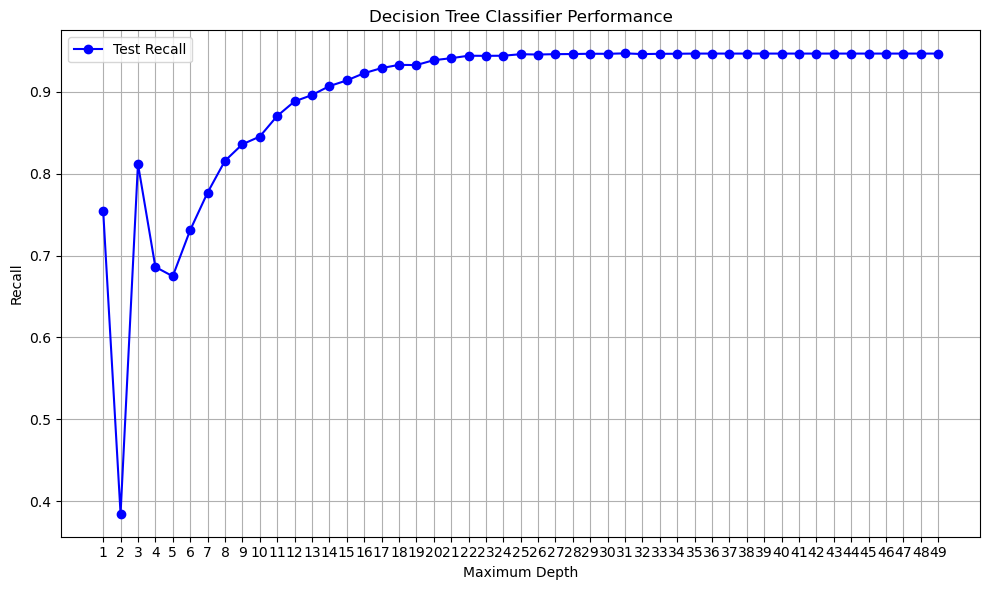

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_train_SMOTE = train_smote['target_b']
X_train_SMOTE = train_smote.drop(['target_b'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=42)

max_depth = range(1, 50)
test_recall = []

for depth in max_depth:
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    recall = recall_score(y_test, y_pred)
    test_recall.append(recall)

plt.figure(figsize=(10, 6))
plt.plot(max_depth, test_recall, marker='o', linestyle='-', color='b', label='Test Recall')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Maximum Depth')
plt.ylabel('Recall')
plt.xticks(max_depth)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

y_train_SMOTE = train_smote['target_b']
X_train_SMOTE = train_smote.drop(['target_b'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=42)

n_estimators_list = [50,100]
max_depth_list = [24,31,34]

auc_list =[]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.auc(fpr, tpr)
        
        auc_list.append((n_estimators, max_depth, auc))

for auc_result in auc_list:
    print(f"n_estimators = {auc_result[0]}, max_depth = {auc_result[1]}, AUC = {auc_result[2]}")

n_estimators = 50, max_depth = 24, AUC = 0.9882854431460991
n_estimators = 50, max_depth = 31, AUC = 0.9888626816140499
n_estimators = 50, max_depth = 34, AUC = 0.9887605916817883
n_estimators = 100, max_depth = 24, AUC = 0.9891680902337023
n_estimators = 100, max_depth = 31, AUC = 0.9899679667799162
n_estimators = 100, max_depth = 34, AUC = 0.9898342178827817


In [33]:
from sklearn.ensemble import RandomForestClassifier

best_n_estimators = 100
best_max_depth = 31

model_rf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=31, random_state=42)

In [ ]:
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))